In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('../../Python for ML/08-Linear-Regression-Models/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
X = df.drop('sales', axis=1)
y = df['sales']

In [4]:
ploynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [5]:
ploynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [6]:
poly_features = ploynomial_converter.transform(X)

In [7]:
poly_features.shape

(200, 9)

In [8]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [9]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [10]:
ploynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]],
      shape=(200, 9))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
test_predictions = model.predict(X_test)
test_predictions

array([13.94856153, 19.33480262, 12.31928162, 16.76286337,  7.90210901,
        6.94143792, 20.13372693, 17.50092709, 10.56889   , 20.12551788,
        9.44614537, 14.09935417, 12.05513493, 23.39254049, 19.67508393,
        9.15626258, 12.1163732 ,  9.28149557,  8.44604007, 21.65588129,
        7.05070331, 19.35854208, 27.26716369, 24.58689346,  9.03179421,
       11.81070232, 20.42630125,  9.19390639, 12.74795186,  8.64340674,
        8.66294151, 20.20047377, 10.93673817,  6.84639129, 18.27939359,
        9.47659449, 10.34242145,  9.6657038 ,  7.43347915, 11.03561332,
       12.65731013, 10.65459946, 11.20971496,  7.46199023, 11.38224982,
       10.27331262,  6.15573251, 15.50893362, 13.36092889, 22.71839277,
       10.40389682, 13.21622701, 14.23622207, 11.8723677 , 11.68463616,
        5.62217738, 25.03778913,  9.53507734, 17.37926571, 15.7534364 ])

In [15]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [16]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)

In [17]:
MAE

0.48967980448035714

In [18]:
RMSE

np.float64(0.6646431757269013)

For Simple Linear regression: MAE: 1.213745773614481 RMSE: 1.5161519375993882

In [19]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [20]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [21]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [22]:
# Create different order PolynomialFeatures
train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 10):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    model = LinearRegression()
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [23]:
train_rmse_errors

[np.float64(1.734594124329376),
 np.float64(0.5879574085292232),
 np.float64(0.4339344356902067),
 np.float64(0.3517083688399344),
 np.float64(0.25093429427318187),
 np.float64(0.20953728407560362),
 np.float64(0.22046861081010746),
 np.float64(0.2714979300040696),
 np.float64(0.5132041914371314)]

In [24]:
test_rmse_errors

[np.float64(1.5161519375993884),
 np.float64(0.6646431757269013),
 np.float64(0.5803286825223),
 np.float64(0.50777426452362),
 np.float64(2.575821996168421),
 np.float64(9.871392042977604),
 np.float64(41.329867017496746),
 np.float64(3103.173283116804),
 np.float64(12767.74756403785)]

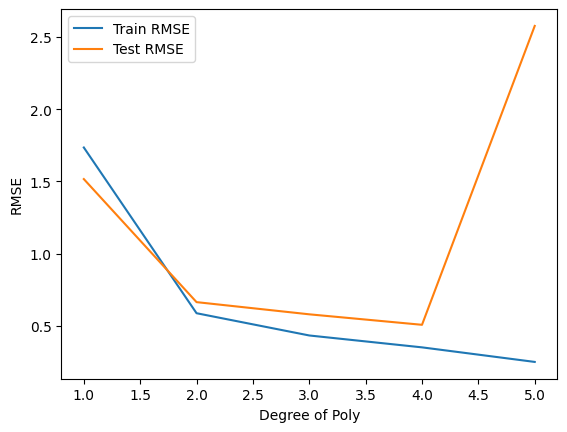

In [25]:
plt.plot(range(1, 6), train_rmse_errors[:5], label="Train RMSE")
plt.plot(range(1, 6), test_rmse_errors[:5], label="Test RMSE")
plt.ylabel("RMSE")
plt.xlabel("Degree of Poly")
plt.legend()

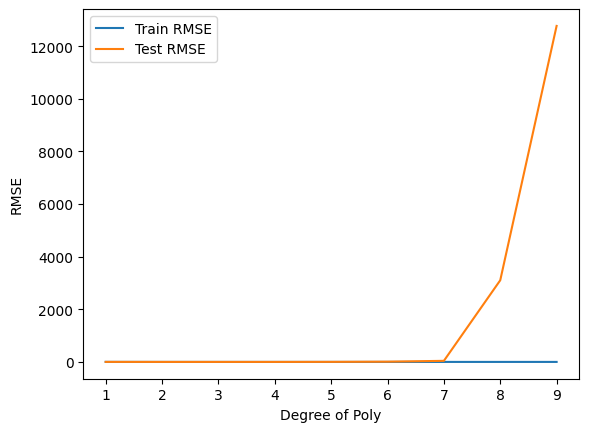

In [26]:
plt.plot(range(1, 10), train_rmse_errors, label="Train RMSE")
plt.plot(range(1, 10), test_rmse_errors, label="Test RMSE")
plt.ylabel("RMSE")
plt.xlabel("Degree of Poly")
plt.legend()

In [27]:
final_poly_conerter = PolynomialFeatures(degree=3, include_bias=False)

In [28]:
final_model = LinearRegression()

In [29]:
full_converted_X = final_poly_conerter.fit_transform(X)
final_model.fit(full_converted_X, y)

LinearRegression()

In [30]:
from joblib import dump, load

In [31]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [32]:
dump(final_poly_conerter, 'final_converter.joblib')

['final_converter.joblib']

In [33]:
loaded_converter = load('final_converter.joblib')

In [34]:
loaded_model = load('final_poly_model.joblib')

In [35]:
campaign = [[149, 22, 12]]

In [36]:
transformed_data = loaded_converted.fit_transform(campaign)

NameError: name 'loaded_converted' is not defined

In [ ]:
transformed_data.shape

In [ ]:
loaded_model.predict(transformed_data)